# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f"{url}{city}&appid={weather_api_key}")

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | murzuq
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | manay
Processing Record 7 of Set 1 | meadow lakes
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | uturoa
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | gargalianoi
Processing Record 12 of Set 1 | jasper
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | hassi messaoud
Processing Record 15 of Set 1 | alotau
City not found. Skipping...
Processing Record 16 of Set 1 | las tablas
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | nova vicosa
Processing Record 20 of Set 1 | oyama
Processing Record 21 of Set 1 | codrington
Processing Record 22 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,285.38,77,96,3.53,SH,1718295943
1,yellowknife,62.4560,-114.3525,290.60,56,40,2.06,CA,1718295706
2,adamstown,-25.0660,-130.1015,293.01,63,3,4.36,PN,1718295944
3,murzuq,25.9155,13.9184,314.03,6,0,7.52,LY,1718295945
4,iqaluit,63.7506,-68.5145,276.00,81,100,7.20,CA,1718295945


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,285.38,77,96,3.53,SH,1718295943
1,yellowknife,62.4560,-114.3525,290.60,56,40,2.06,CA,1718295706
2,adamstown,-25.0660,-130.1015,293.01,63,3,4.36,PN,1718295944
3,murzuq,25.9155,13.9184,314.03,6,0,7.52,LY,1718295945
4,iqaluit,63.7506,-68.5145,276.00,81,100,7.20,CA,1718295945


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

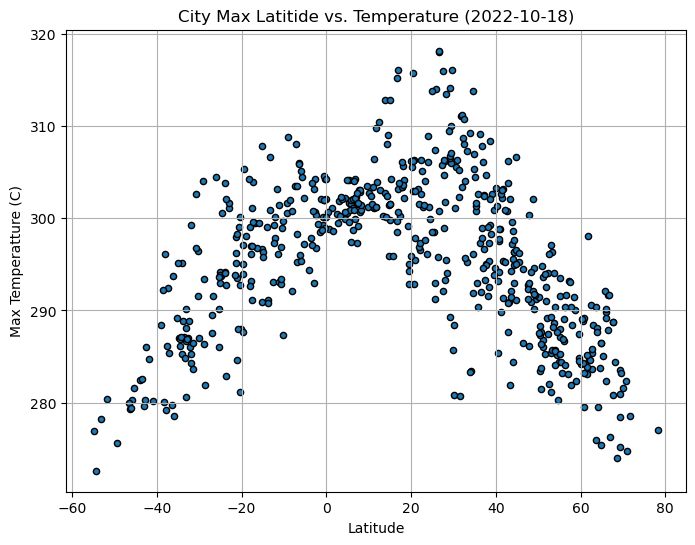

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat",y="Max Temp",grid =True,figsize = (8,6),edgecolor= "black")

# Incorporate the other graph properties
plt.title("City Max Latitide vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperatture (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

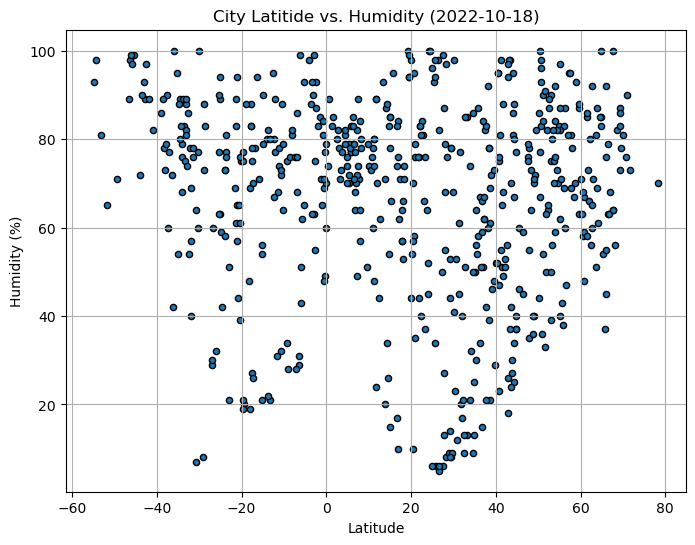

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat",y="Humidity",grid =True,figsize = (8,6),edgecolor= "black")

# Incorporate the other graph properties
plt.title("City Latitide vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

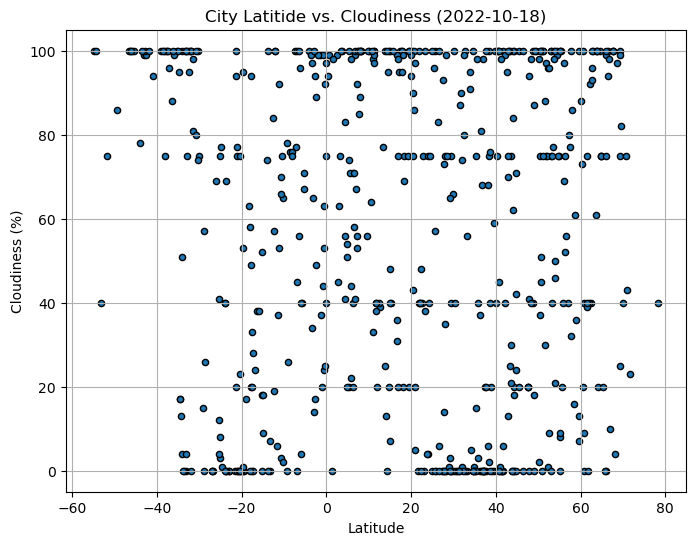

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat",y= "Cloudiness",grid =True,figsize = (8,6),edgecolor= "black")

# Incorporate the other graph properties
plt.title("City Latitide vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

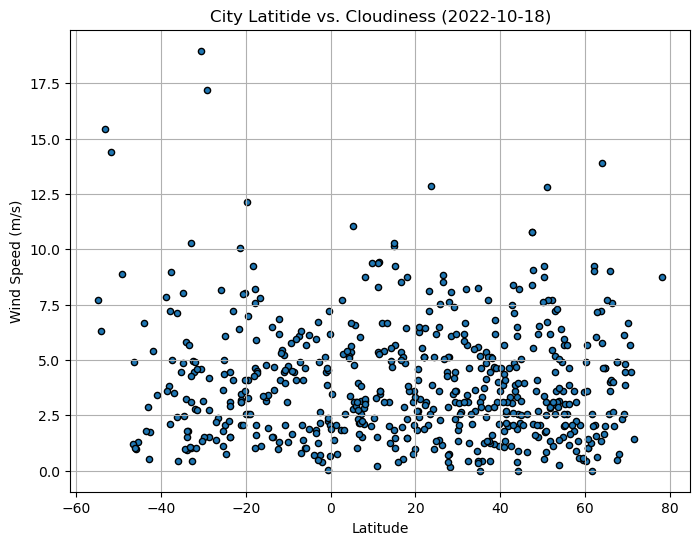

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat",y="Wind Speed",grid =True,figsize = (8,6),edgecolor= "black")

# Incorporate the other graph properties
plt.title("City Latitide vs. Cloudiness (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
x =
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

NameError: name 'x' is not defined

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>= 0 ,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yellowknife,62.4560,-114.3525,290.60,56,40,2.06,CA,1718295706
3,murzuq,25.9155,13.9184,314.03,6,0,7.52,LY,1718295945
4,iqaluit,63.7506,-68.5145,276.00,81,100,7.20,CA,1718295945
5,manay,7.2150,126.5397,297.37,82,92,2.56,PH,1718295946
6,meadow lakes,61.6247,-149.6011,283.14,85,75,0.00,US,1718295947


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]< 0 ,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,285.38,77,96,3.53,SH,1718295943
2,adamstown,-25.0660,-130.1015,293.01,63,3,4.36,PN,1718295944
8,uturoa,-16.7333,-151.4333,299.49,78,24,7.79,PF,1718295948
15,port-aux-francais,-49.3500,70.2167,275.65,71,86,8.89,TF,1718295953
17,nova vicosa,-17.8919,-39.3719,299.08,69,58,4.62,BR,1718295954


###  Temperature vs. Latitude Linear Regression Plot

y =-0.33x +307.98


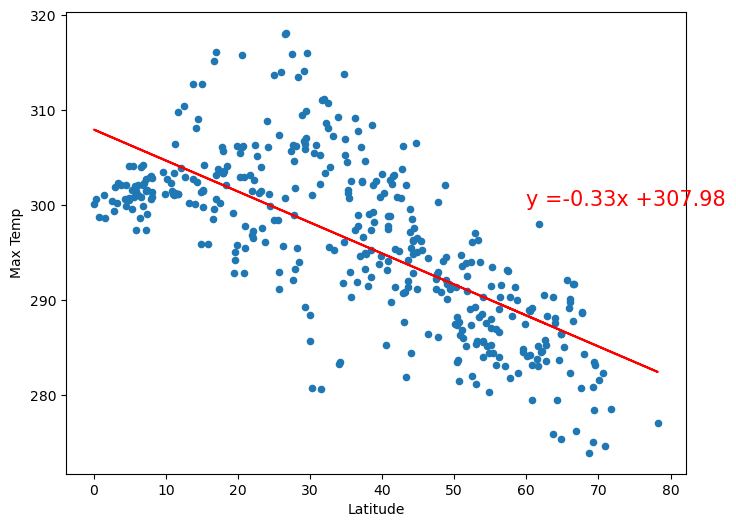

The r-value is:-0.7075886953899666


In [18]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
northern_hemi_df.plot(kind ="scatter",y="Max Temp", x="Lat",figsize = (8,6))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
#plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq, (60,300), fontsize=15, color='red')
plt.show()
#print r value
print(f"The r-value is:{rvalue}")



y =0.45x +303.4


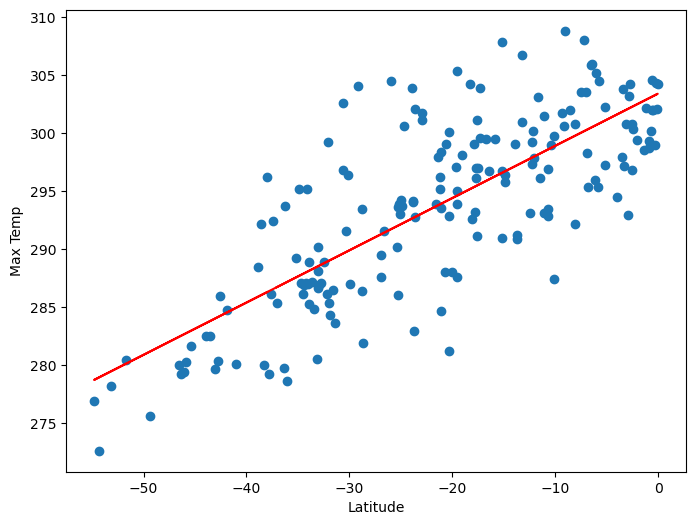

The r-value is:0.7738783831270462


In [19]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
southern_hemi_df.plot(kind ="scatter",y="Max Temp", x="Lat",figsize = (8,6))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq,(-20,270), fontsize = 15, color = "red")
plt.show()
#print r value
print(f"The r-value is:{rvalue}")



**Discussion about the linear relationship:** These linear regression models illustrate the relationship between latitude and temperature in the northern and southern hemispheres. The negative slope in the NH and positive slope in the SH indicate how temperature generally varies with latitude within each hemisphere. That is, The negative slope suggests that temperature decreases as latitude increases in the northern hemisphere while the positive slope suggests that temperature increases as latitude increases in the southern hemisphere.The y-intercepts provide insights into equatorial temperatures, while the slopes highlight different rates of temperature change with latitude between the two hemispheres. These relationships are fundamental in understanding broad climatic patterns across the Earth's surface.

### Humidity vs. Latitude Linear Regression Plot

y =0.05x +63.1
The r-value is:0.037598572573121436


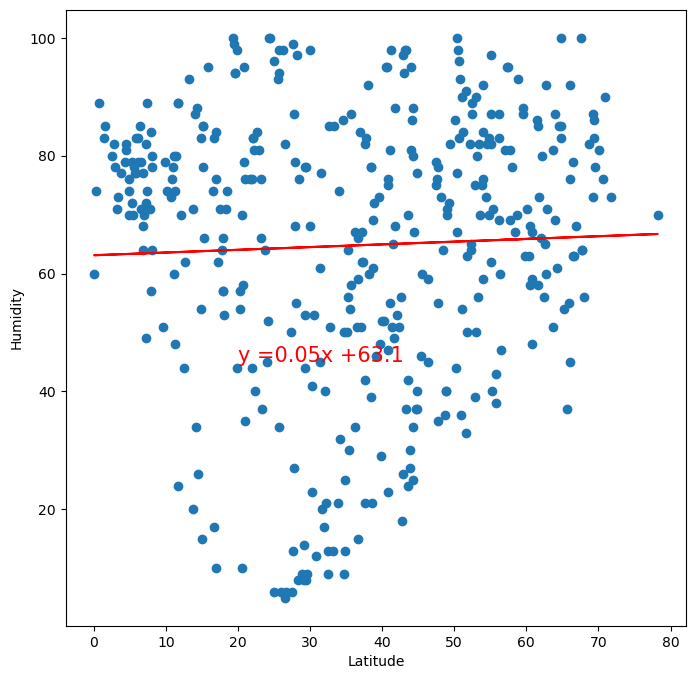

In [23]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
northern_hemi_df.plot(kind ="scatter",y="Humidity", x="Lat",figsize = (8,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq,(20,45), fontsize = 15, color = "red")

#print r value
print(f"The r-value is:{rvalue}")
plt.show()

y =-0.3x +63.64
The r-value is:-0.18818279513933936


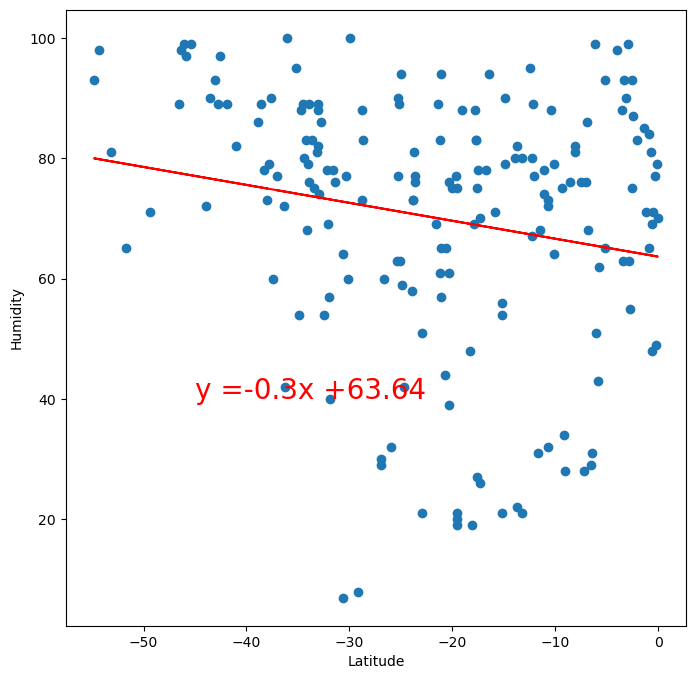

In [31]:
# Southern Hemisphere
# Linear regression on southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
southern_hemi_df.plot(kind ="scatter",y="Humidity", x="Lat",figsize = (8,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq,(-45,40), fontsize = 20, color = "red")

#print r value
print(f"The r-value is:{rvalue}")
plt.show()


**Discussion about the linear relationship:** the linear regression models for humidity versus latitude in the northern and southern hemispheres illustrate general trends in atmospheric moisture content. The slight positive slope in the NH and negative slope in the SH indicate how humidity tends to change with latitude within each hemisphere. That is, the positive slope suggests that humidity tends to increase slightly as you move northward in the northern hemisphere while he negative slope suggests that humidity tends to decrease as you move southward in the southern hemisphere. . The y-intercepts provide estimates of equatorial humidity levels, which are relatively close between hemispheres. These relationships help in understanding broad patterns of humidity distribution across different latitudes on Earth.

### Cloudiness vs. Latitude Linear Regression Plot

y =-0.04x +57.73


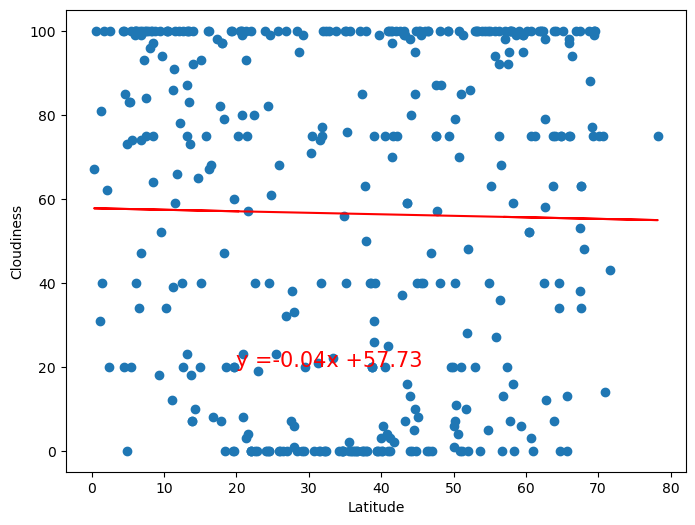

The r-value is:-0.017884067284253336


In [ ]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
northern_hemi_df.plot(kind ="scatter",y="Cloudiness", x="Lat",figsize = (8,6))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq,(20,20), fontsize = 15, color = "red")
plt.show()

#print r value
print(f"The r-value is:{rvalue}")

y =-0.02x +55.69


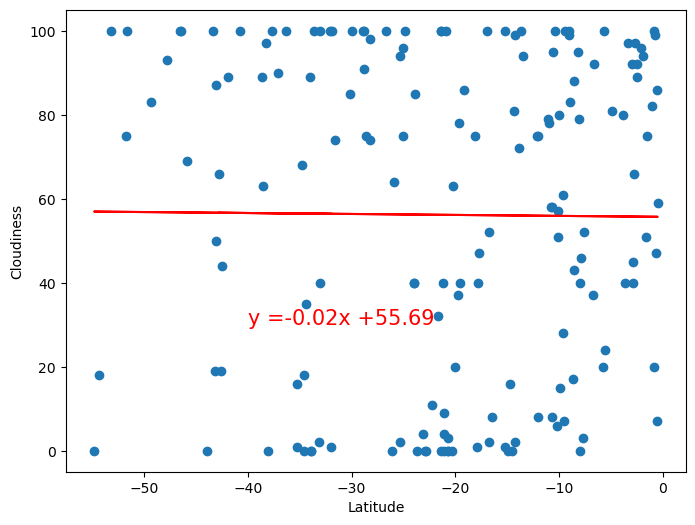

The r-value is:-0.008480468934842838


In [ ]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
southern_hemi_df.plot(kind ="scatter",y="Cloudiness", x="Lat",figsize = (8,6))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq,(-40,30), fontsize = 15, color = "red")
plt.show()
#print r value
print(f"The r-value is:{rvalue}")

**Discussion about the linear relationship:** , the linear regression models for cloudiness versus latitude in the northern and southern hemispheres illustrate the general trends in cloud cover distribution. The negative slopes indicate decreasing cloudiness with increasing latitude in both hemispheres.Slope (-0.04): Indicates a slight negative relationship between latitude (x) and cloudiness (y) in the northern hemisphere. As latitude increases (moving northward), cloudiness tends to decrease slightly.Slope (-0.02): Indicates a slight negative relationship between latitude (x) and cloudiness (y) in the southern hemisphere. As latitude increases (moving southward), cloudiness also tends to decrease, but at a slower rate compared to the northern hemisphere.The y-intercepts suggest slightly higher cloudiness levels near the equator in the northern hemisphere. These relationships contribute to understanding broad patterns of cloud cover across different latitudes on Earth.

### Wind Speed vs. Latitude Linear Regression Plot

y =-0.02x +4.09


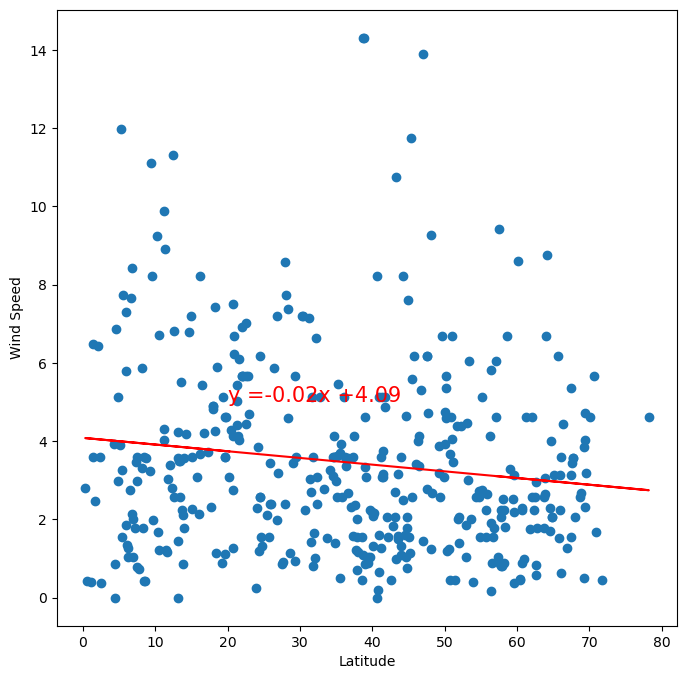

The r-value is:-0.13795123741956125


In [ ]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
northern_hemi_df.plot(kind ="scatter",y="Wind Speed", x="Lat",figsize = (8,8))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Perform linear regression
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq,(20,5), fontsize = 15, color = "red")
plt.show()
#print r value
print(f"The r-value is:{rvalue}")

y =-0.04x +2.75


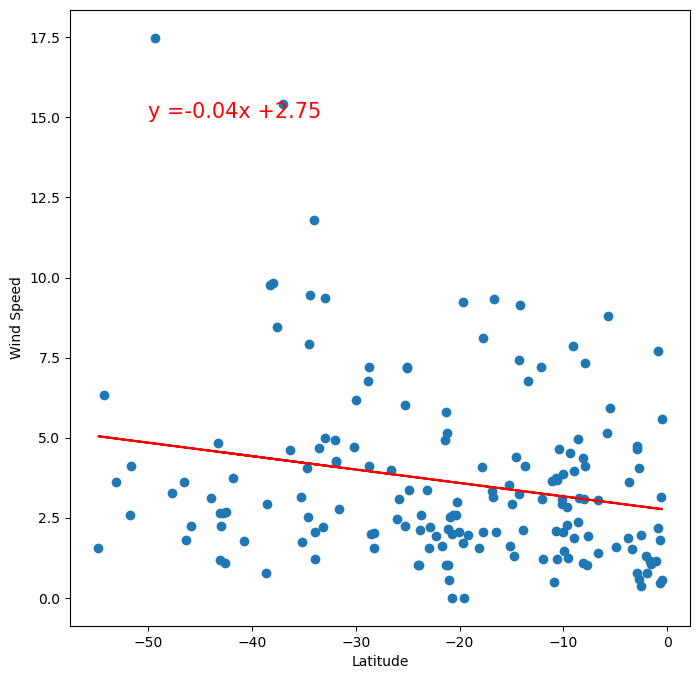

The r-value is:-0.21323154329771085


In [ ]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
southern_hemi_df.plot(kind ="scatter",y="Wind Speed", x="Lat",figsize = (8,8))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Perform linear regression
(slope,intercept,rvalue,pvalue,syderr) = st.linregress(x,y)

#Getting regression values
regres_values = x * slope + intercept

#Creating line equation string
line_eq = "y ="+ str (round(slope,2)) + "x +" + str(round(intercept,2))

print(line_eq)

#Create plot
plt.scatter(x,y)
plt.plot(x, regres_values,"r-")

#Annotate the line equation
plt.annotate(line_eq,(-50,15), fontsize = 15, color = "red")
plt.show()
#print r value
print(f"The r-value is:{rvalue}")

**Discussion about the linear relationship:** The linear regression models for wind speed versus latitude in the northern and southern hemispheres illustrate the general trends in wind speed distribution. The negative slopes indicate decreasing wind speed with increasing latitude in both hemispheres, with a faster decline observed in the southern hemisphere. The y-intercepts suggest higher wind speeds near the equator in the northern hemisphere. These relationships contribute to understanding broad patterns of wind circulation across different latitudes on Earth.